In [25]:
import pandas as pd

# Define the file paths
input_file_path = 'C:\Aditya\College Code\ML Lab\exp 2\household_power_consumption.txt'
output_file_path = 'house_Power_Consumption.csv'

# Read the text file into a DataFrame
df = pd.read_csv(input_file_path, delimiter=';')

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"File has been successfully converted to {output_file_path}")


C:\Users\jetha\AppData\Local\Temp\ipykernel_18792\4016797160.py:8: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path, delimiter=';')


File has been successfully converted to house_Power_Consumption.csv


In [26]:
#count the number of null values
print(df.isnull().sum())


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [27]:
#interpolate the missing values
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)
print(df.isnull().sum())

C:\Users\jetha\AppData\Local\Temp\ipykernel_18792\2805250540.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method ='linear', limit_direction ='forward', inplace=True)


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


## convert date and time column to single datetime column

In [28]:
# Convert 'Date' and 'Time' columns to a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(columns=['Date', 'Time'], inplace=True)

## applying proper formatting for numeric columns

In [29]:
# Convert numeric columns to appropriate data types
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

## Creating columns for additional time based features

In [30]:
# Create additional time-based features
df['Hour'] = df['Datetime'].dt.hour
df['Day_of_Week'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month

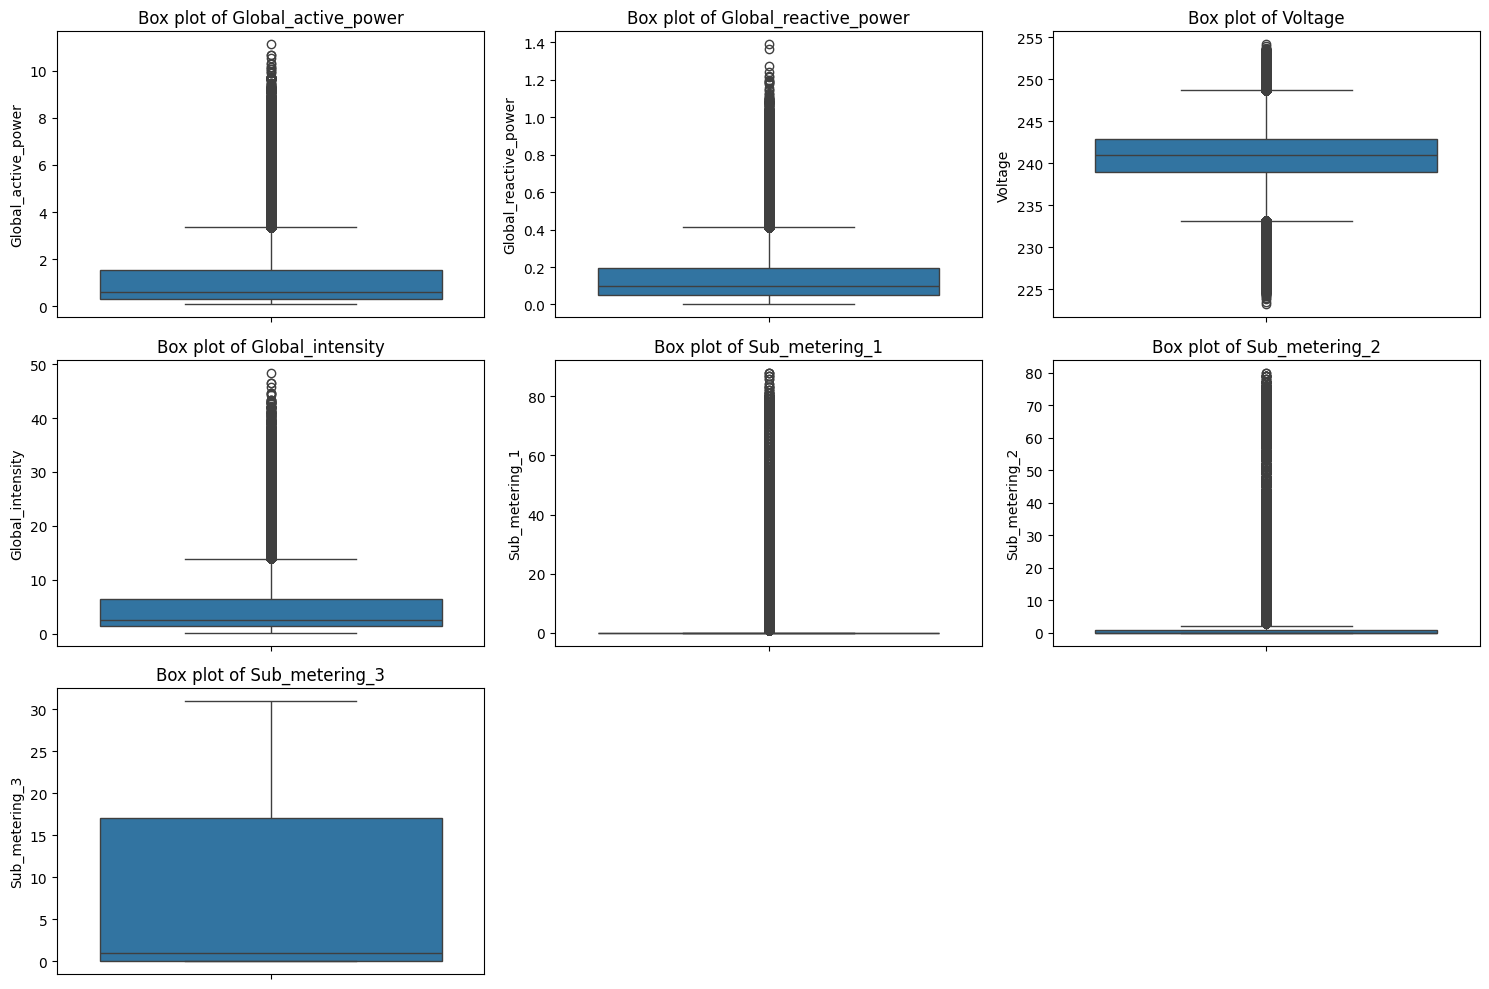

In [31]:
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

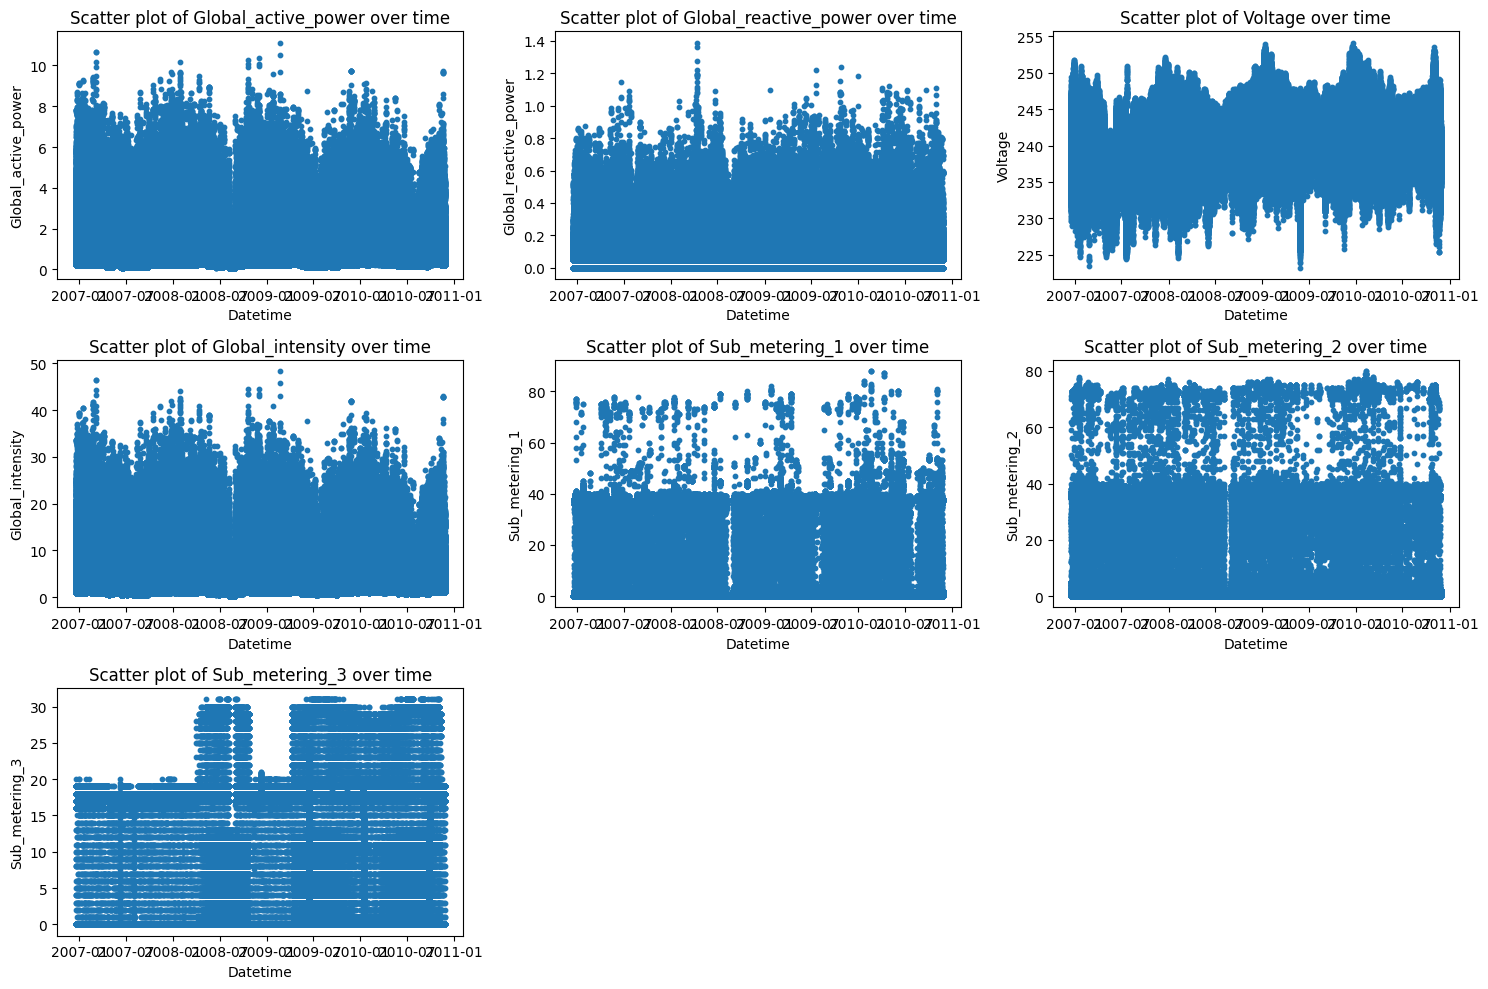

In [32]:
# Plotting scatter plots to visualize outliers over time
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df['Datetime'], df[column], s=10)
    plt.title(f'Scatter plot of {column} over time')
    plt.xlabel('Datetime')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [33]:
#save the preprocessed data
output_file_path = 'house_Power_Consumption_preprocessed.csv'
df.to_csv(output_file_path, index=False)